In [2]:
import idx2numpy
import numpy as np
from matplotlib import pyplot as plt

In [3]:
file = 'MNIST_ORG/train-images.idx3-ubyte'
trainx = idx2numpy.convert_from_file(file)
file = 'MNIST_ORG/train-labels.idx1-ubyte'
trainy = idx2numpy.convert_from_file(file)

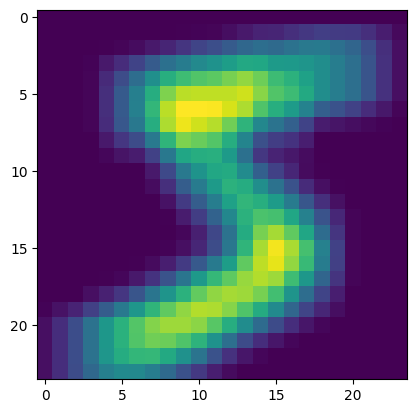

In [10]:
image = trainx[0]
filter = np.ones((5,5))
feature_map = np.array([[sum(image[j+l,k+m]*filter[l][m] for l in range(5) for m in range(5)) for k in range(24)] for j in range(24)])
plt.imshow(feature_map)
plt.show()

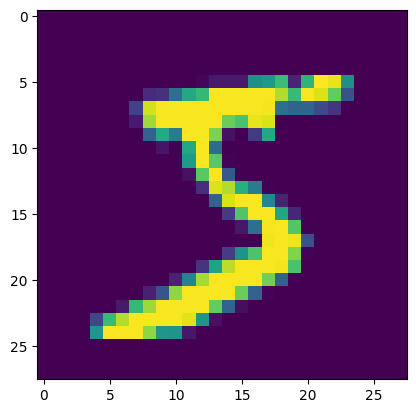

In [8]:
plt.imshow(image)

In [42]:
w1 = np.random.uniform(-1,1,(20,5,5)) / np.sqrt(20*24*24)
w2 = np.random.uniform(-1,1,(10,2880)) / np.sqrt(2880*100)
learning_rate = .00005
def forward_backward(x,y):
    global w1,w2
    y = np.array([0 if i != y else 1 for i in range(10)])
    x0 = x
    x1 = np.array([[[sum(x0[j+l,k+m]*w1[i,l,m] for l in range(5) for m in range(5)) for k in range(24)] for j in range(24)] for i in range(20)])
    x2 = np.maximum(x1,0)
    x3 = np.array([[[np.max(x2[i,j:j+2,k:k+2]) for k in range(0,24,2)] for j in range(0,24,2)] for i in range(20)])
    x4 = x3.flatten()
    x5 = w2.dot(x4)
    print(x5)
    print(x1.shape)
    c = .5*np.linalg.norm(y-x5)**2
    dcdx5 = x5-y
    dcdw2 = np.outer(dcdx5,x4)
    dcdx4 = w2.T.dot(dcdx5)
    dcdx3 = dcdx4.reshape(20,12,12)
    dcdx2 = np.zeros((20,24,24))
    for i in range(20): 
        for j in range(24):
            for k in range(24):
                dcdx2[i,j,k] = dcdx3[i,j//2,k//2]*(1 if x2[i,j,k] == np.max(x2[i,2*(j//2):2*(j//2)+2,2*(k//2):2*(k//2)+2]) else 0)
    dcdx1 = dcdx2*(x1>1)
    print(dcdx1.shape)
    dcdw1 = np.zeros((20,5,5))
    for i in range(20):
        for l in range(5):
            for m in range(5):
                dcdw1[i,l,m] = sum(dcdx1[i,j,k]*x0[j+l,k+m] for j in range(24) for k in range(24))
    w2 = w2-learning_rate*dcdw2
    w1 = w1-learning_rate*dcdw1
    return c

[ 0.10589959  0.21569476  0.15986032  0.39361995  0.26276531  0.15212314
 -0.05639268  0.02119741 -0.06630364 -0.10361561]
(20, 24, 24)
(20, 24, 24)
[ 0.37184511 -0.02114808  0.08031735  0.22103719  0.25201034  0.16953242
  0.01924386  0.02031133 -0.01661532  0.09081744]
(20, 24, 24)
(20, 24, 24)
[-0.0294343  -0.05833259 -0.09191496  0.1529865   0.4955161   0.09981669
 -0.02834557  0.02347715 -0.03324724 -0.00053421]
(20, 24, 24)
(20, 24, 24)
[ 0.02342965  0.32049789  0.04367333 -0.05329134  0.20389543  0.10947432
 -0.04875056  0.04103195  0.02613664  0.02388575]
(20, 24, 24)
(20, 24, 24)
[ 0.21046277  0.27744808 -0.05427619 -0.04997818  0.13211786 -0.05395643
  0.0450491  -0.0655071  -0.015677    0.28114914]
(20, 24, 24)
(20, 24, 24)
[ 0.19512922  0.03803246  0.30536745  0.10280153  0.06674079 -0.06382981
  0.02093703 -0.04559683 -0.01950013  0.29647155]
(20, 24, 24)
(20, 24, 24)
[ 0.02803388  0.4711078   0.00359773 -0.02158085  0.03014035  0.24112138
  0.03856289  0.0845186   0.04120

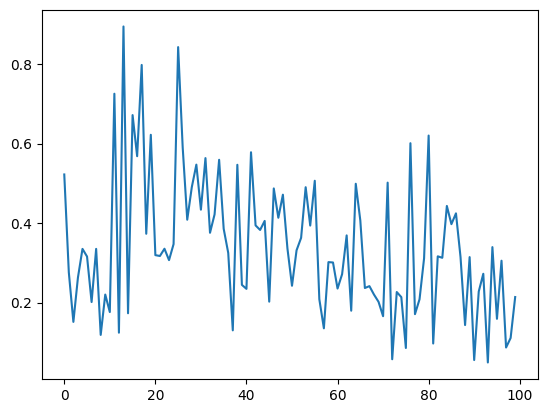

In [44]:
loss = []

for i in range(100):
    loss.append(forward_backward(trainx[i],trainy[i]))

plt.plot(loss)
plt.show()

[ 0.28104442 -0.0104264  -0.1739183   0.02892461  0.18636179  0.03114775
 -0.02661835  0.60740763  0.04791843  0.03981351]
(20, 24, 24)
(20, 24, 24)
[-0.10791257  0.79263972 -0.02817172  0.02839413 -0.14358312  0.01717702
  0.14233334  0.13683769  0.13395373  0.06195971]
(20, 24, 24)
(20, 24, 24)
[ 0.08122847  0.01976942  0.1091761  -0.0910198   0.06661468  0.03465289
 -0.12035737  0.7039675   0.06555946  0.31332615]
(20, 24, 24)
(20, 24, 24)
[-0.09618051  0.58819802 -0.03418851  0.13821031  0.04695931 -0.03254872
  0.16064684  0.09955149  0.17403603 -0.02250826]
(20, 24, 24)
(20, 24, 24)
[-0.05015313  0.84320336  0.04799775 -0.03020238 -0.08140176  0.06169675
  0.06880374  0.09232858  0.08505914 -0.12655864]
(20, 24, 24)
(20, 24, 24)
[ 0.02343917  0.03775352  0.08941566  0.30633429  0.05371303 -0.01064441
  0.61705533 -0.04430776 -0.11569755 -0.06144734]
(20, 24, 24)
(20, 24, 24)
[ 0.02930004  0.14210725  0.01356724  0.40320645 -0.00681474  0.0534066
  0.14222954 -0.0348585   0.173162

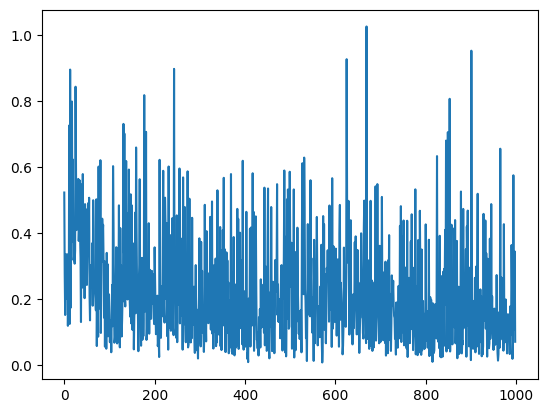

In [45]:
for i in range(101,1000):
    loss.append(forward_backward(trainx[i],trainy[i]))

plt.plot(loss)
plt.show()

[-0.10599448  0.07059067 -0.21693081  0.00144485  0.32372514  0.05046822
 -0.02321904  0.80587246  0.12235599 -0.11503412]
(20, 24, 24)
(20, 24, 24)
[-0.02993355  0.70020416 -0.00597292  0.06757613 -0.02653165 -0.02459289
  0.11049885  0.06447235 -0.10385458  0.08552434]
(20, 24, 24)
(20, 24, 24)
[-0.04105185  0.76854933  0.08660056  0.0462491   0.01197916 -0.00635451
 -0.03303299 -0.02298198  0.11583963 -0.0420421 ]
(20, 24, 24)
(20, 24, 24)
[-0.06698878  0.09430794 -0.10945488  0.28808712  0.14705591  0.08218007
  0.02593749  0.08150953 -0.01255527  0.35094839]
(20, 24, 24)
(20, 24, 24)
[ 0.14254312 -0.11039099 -0.06213423  0.01764178  0.40172907 -0.10926682
 -0.09523766  0.11046671  0.13447279  0.33680858]
(20, 24, 24)
(20, 24, 24)
[ 0.0220235   0.17714609 -0.03049902  0.01056399  0.62137901 -0.11742728
  0.15388385  0.11000115 -0.15899263  0.34285853]
(20, 24, 24)
(20, 24, 24)
[-0.08916029 -0.08012988  0.08385509  0.44566658  0.15811107  0.11390538
 -0.08247568  0.19141917 -0.03899

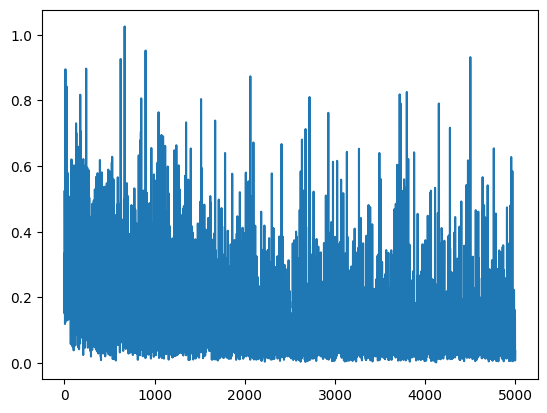

In [49]:
for i in range(1001,5000):
    loss.append(forward_backward(trainx[i],trainy[i]))

plt.plot(loss)
plt.show()

In [47]:
def forward(x):
    global w1,w2
    x0 = x
    x1 = np.array([[[sum(x0[j+l,k+m]*w1[i,l,m] for l in range(5) for m in range(5)) for k in range(24)] for j in range(24)] for i in range(20)])
    x2 = np.maximum(x1,0)
    x3 = np.array([[[np.max(x2[i,j:j+2,k:k+2]) for k in range(0,24,2)] for j in range(0,24,2)] for i in range(20)])
    x4 = x3.flatten()
    x5 = w2.dot(x4)
    return np.argmax(x5)
    

In [50]:
count = 0
for i in range(13000,13500):
    if forward(trainx[i]) == trainy[i]:
        count += 1

print(count)

462
